In [ ]:
from google.colab import drive
import zipfile
import os


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Path to your CSV file in Drive
csv_path = '/content/drive/MyDrive/HousingData.csv'

# Load into DataFrame
boston_df = pd.read_csv(csv_path)

# Show first few rows
print(boston_df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [ ]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
print(boston_df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [ ]:
boston_df.isnull().sum()  # chacking missing values

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


Preparing the Dataset

In [ ]:
df2 = boston_df.fillna(boston_df.median())  # handling missing values by replacing w median

In [ ]:
df2.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


EDA

In [ ]:
# correlation
corr_matrix = df2.corr()
print(corr_matrix)


             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.185359  0.392632 -0.055585  0.410971 -0.220045  0.343427   
ZN      -0.185359  1.000000 -0.507304 -0.032992 -0.498619  0.312295 -0.535341   
INDUS    0.392632 -0.507304  1.000000  0.054693  0.738387 -0.377978  0.614248   
CHAS    -0.055585 -0.032992  0.054693  1.000000  0.070867  0.106797  0.074984   
NOX      0.410971 -0.498619  0.738387  0.070867  1.000000 -0.302188  0.711864   
RM      -0.220045  0.312295 -0.377978  0.106797 -0.302188  1.000000 -0.239518   
AGE      0.343427 -0.535341  0.614248  0.074984  0.711864 -0.239518  1.000000   
DIS     -0.366025  0.632428 -0.698621 -0.092318 -0.769230  0.205246 -0.724354   
RAD      0.601224 -0.300061  0.592735 -0.003339  0.611441 -0.209847  0.447088   
TAX      0.560469 -0.304385  0.716267 -0.035822  0.668023 -0.292048  0.498408   
PTRATIO  0.277964 -0.394622  0.385366 -0.109451  0.188933 -0.355501  0.261826   
B       -0.365336  0.170125 

most +ively correalted to medv --> rm


most -ively correalted to medv --> lstat





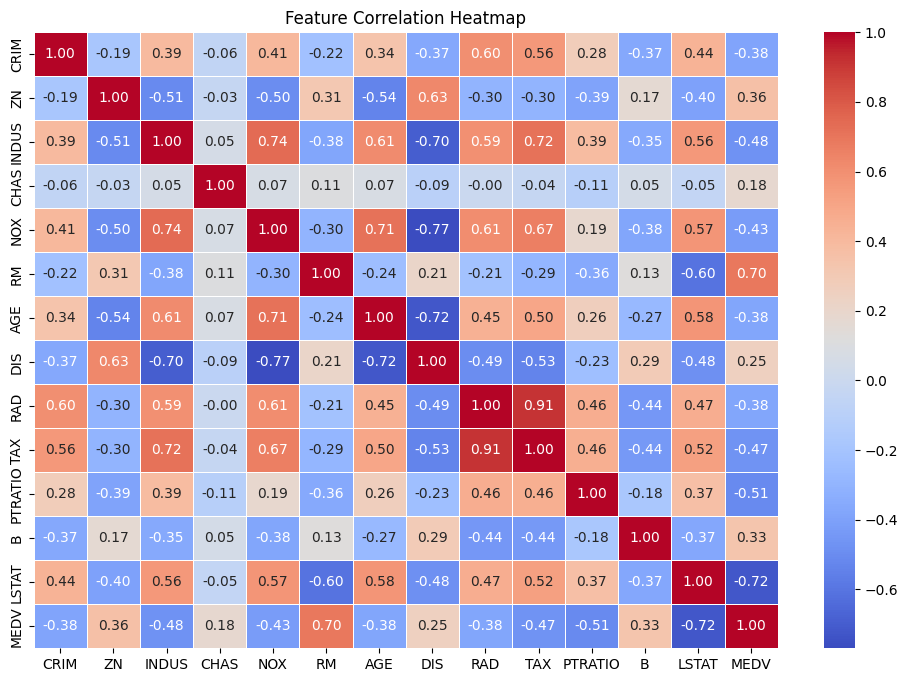

In [ ]:
# visualizing the correaltion using heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show plot
plt.title('Feature Correlation Heatmap')
plt.show()


In [ ]:
# independant and dependant features
X = df2.iloc[:,:-1]
y = df2.iloc[:,-1]

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43


In [ ]:
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:
# train - test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
332,0.03466,0.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,76.8,2.0218,24,666,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [ ]:
# standardizing the dataset
# all the features have been measured in their respective units, we need to make them one standard
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[ 1.31113389, -0.47914112,  1.08544651, ...,  0.84534281,
        -0.07433689,  1.79184271],
       [-0.32013052, -0.47914112, -0.40091153, ...,  1.20474139,
         0.4301838 , -0.57058496],
       [-0.38729492, -0.47914112, -0.71131561, ..., -0.63717631,
         0.06529747, -0.66255294],
       ...,
       [-0.38952153,  2.99847869, -1.31570819, ..., -0.59225149,
         0.37901005, -0.92696091],
       [ 0.87340327, -0.47914112,  1.08544651, ...,  0.84534281,
        -2.69458597,  1.55617474],
       [-0.36530074, -0.47914112, -0.33823378, ...,  1.15981657,
        -3.12158061, -0.260193  ]])

In [ ]:
# model training
from sklearn.linear_model import LinearRegression
regression = LinearRegression()


In [ ]:
regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
# printing coeficents and intercepts
print(regression.coef_)
print(regression.intercept_)

[-0.9934725   0.64824488 -0.17191877  0.83290764 -1.87839285  3.34243906
 -0.49638185 -3.20611875  1.87210088 -1.50273794 -1.98110867  1.10044995
 -3.0909313 ]
22.796534653465347


In [ ]:
# prediction with test data
reg_pred = regression.predict(X_test)

In [ ]:
reg_pred

array([ 2.90229076e+01,  3.65165445e+01,  1.45393017e+01,  2.50600581e+01,
        1.83967266e+01,  2.30288828e+01,  1.79671579e+01,  1.45828295e+01,
        2.20828043e+01,  2.08561812e+01,  2.51163978e+01,  1.85615496e+01,
       -5.65346810e+00,  2.17307279e+01,  1.90724377e+01,  2.59110845e+01,
        1.96745390e+01,  5.82734420e+00,  4.08961762e+01,  1.71863926e+01,
        2.53685702e+01,  3.02269659e+01,  1.17956763e+01,  2.35052226e+01,
        1.73202890e+01,  1.50842857e+01,  2.16408155e+01,  1.45043809e+01,
        2.28135918e+01,  1.94256178e+01,  2.25511025e+01,  2.52307392e+01,
        2.55426783e+01,  1.66458528e+01,  1.63916994e+01,  1.66977211e+01,
        3.11293531e+01,  2.02733495e+01,  2.43791078e+01,  2.31362096e+01,
        1.44904686e+01,  3.23022632e+01,  4.29155975e+01,  1.76345789e+01,
        2.76271693e+01,  1.63930624e+01,  1.42626808e+01,  2.61233033e+01,
        1.97094146e+01,  3.01725122e+01,  2.10197700e+01,  3.36926419e+01,
        1.64026207e+01,  

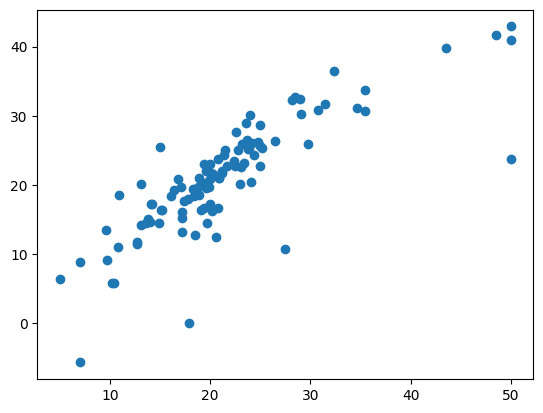

In [ ]:
# plotting a scatter plot for the prediction
plt.scatter(y_test, reg_pred)


# plotting is linear, both values are linear --> model has predicted well

In [ ]:
# checking errors (residuals)
residuals = y_test - reg_pred
residuals


,MEDV
173,-5.422908
274,-4.116545
491,-0.939302
72,-2.260058
452,-2.296727
...,...
412,17.872533
436,-3.962496
411,1.109686
86,-0.263507


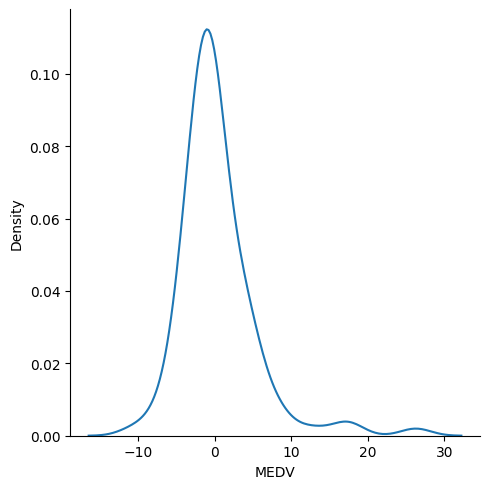

In [ ]:
# plotting residuals
sns.displot(residuals, kind='kde')

# getting a normal distribution but the little peaks at 20-30 show there are some outliers

In [ ]:
# performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("mean absolute error: ", mean_absolute_error(y_test, reg_pred))
print("mean squared error: ",mean_squared_error(y_test, reg_pred))
print("root mean squared error: ",np.sqrt(mean_squared_error(y_test, reg_pred)))

mean absolute error:  3.1487373170237607
mean squared error:  24.999384790103367
root mean squared error:  4.999938478631849


In [ ]:
# r square
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score)

0.659101389390351


In [ ]:
# pickling the model file

import pickle

# Path to your Drive folder
file_path = '/content/drive/MyDrive/boston_house_prediction_project/model.pkl'

# Saving
with open(file_path, 'wb') as f:
    pickle.dump(regression, f)



In [ ]:
import pickle

# Path to your Drive folder
file_path = '/content/drive/MyDrive/boston_house_prediction_project/model.pkl'

# Loading later
with open(file_path, 'rb') as f:
    loaded_model = pickle.load(f)

In [ ]:
boston_df.iloc[:, 0]

,CRIM
0,0.00632
1,0.02731
2,0.02729
3,0.03237
4,0.06905
...,...
501,0.06263
502,0.04527
503,0.06076
504,0.10959


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import pickle

# To predict for a single data point, you need to provide all 13 features
# Create a sample new data point (e.g., using the first row of boston_df for demonstration)
# You would replace this with the actual feature values of the house you want to predict for
# Ensure the new data is in a DataFrame with the same column names as X_train

# Get the original feature names from boston_df (excluding the target column)
feature_names = boston_df.columns[:-1]

# Create a sample single data point as a list or numpy array
# For demonstration, using the values from the first row of boston_df
single_new_data_values = boston_df.iloc[0, :-1].values.reshape(1, -1) # Reshape to 2D for scaler

# Convert the numpy array back to a DataFrame to preserve feature names
single_new_data_df = pd.DataFrame(single_new_data_values, columns=feature_names)

# Transform the single new data point using the *already fitted* scaler
# Ensure the scaler object used here is the one fitted on your training data (X_train)
scaled_single_new_data = scaler.transform(single_new_data_df)

# Predict using the loaded model with the scaled single new data point
predicted_price = loaded_model.predict(scaled_single_new_data)

print(f"Predicted median value price of the house in $1000's: {predicted_price[0]:.2f}")

# If you intend to predict on the entire original dataset (X) again,
# you would transform the original X data using the fitted scaler:
# scaled_X = scaler.transform(X)
# all_predictions = loaded_model.predict(scaled_X)
# print("Predictions for the entire dataset:", all_predictions)

Predicted median value price of the house in $1000's: 30.17
